In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cinci_1320 = pd.read_csv('./data/cinci1320.csv', index_col='Date_of_Payment', parse_dates=True).sort_index()

C:\Users\sarah\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (17,18,19,47,48,49,50,51,52,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
cinci_1320.head()

,Change_Type,Covered_Recipient_Type,Physician_Profile_ID,Physician_First_Name,Physician_Middle_Name,Physician_Last_Name,Physician_Name_Suffix,Recipient_Primary_Business_Street_Address_Line1,Recipient_Primary_Business_Street_Address_Line2,Recipient_City,...,xarelto,victoza,humira,levemir,invokana,farxiga,entresto,chantix,myrbetriq,toujeo
Date_of_Payment,,,,,,,,,,,,,,,,,,,,,
2013-08-01,UNCHANGED,Covered Recipient Physician,148974,RODNEY,NaN,VIVIAN,NaN,8000 5 MILE RD,240,CINCINNATI,...,0,0,0,0,0,0,0,0,0,0
2013-08-01,UNCHANGED,Covered Recipient Physician,58931,PAUL,JOSEPH,FAVORITO,NaN,7575 5 MILE RD,NaN,CINCINNATI,...,0,0,0,0,0,0,0,0,0,0
2013-08-01,UNCHANGED,Covered Recipient Physician,812462,ALFRED,JAMES,SUGAWARA,NaN,8477 FOXCROFT DR,NaN,CINCINNATI,...,0,0,0,0,0,0,0,0,0,0
2013-08-01,UNCHANGED,Covered Recipient Physician,108863,MARK,A,MANEGOLD,NaN,2450 KIPLING AVE,SUITE 104,CINCINNATI,...,0,0,0,0,0,0,0,0,0,0
2013-08-01,UNCHANGED,Covered Recipient Physician,195441,MANOJKUMAR,S,SINGH,NaN,10600 MONTGOMERY RD,SUITE 200,CINCINNATI,...,0,0,0,0,0,0,0,0,0,0


In [4]:
cinci_1320['Change_Type'].value_counts()

UNCHANGED    364686
CHANGED         726
ADD               1
Name: Change_Type, dtype: int64

In [5]:
cinci_1320['myrbetriq'].value_counts()

0    362015
1      3398
Name: myrbetriq, dtype: int64

In [6]:
myrbetriq = cinci_1320[(cinci_1320['myrbetriq']==1) & (cinci_1320['Number_of_Payments_Included_in_Total_Amount']==1)].copy()

In [7]:
myrbetriq['myrbetriq'].value_counts()

1    3398
Name: myrbetriq, dtype: int64

In [8]:
myrbetriq['Change_Type'].value_counts()

UNCHANGED    3398
Name: Change_Type, dtype: int64

In [9]:
myrbetriq['myrb_dollars'] = [k if ((i ==1) & (j ==1)) else 0 for i, j, k in zip(myrbetriq['myrbetriq'], myrbetriq['Number_of_Payments_Included_in_Total_Amount'], myrbetriq['Total_Amount_of_Payment_USDollars'])]

#Ben Peck helped me with this during office hours.  I was oh-so-close but not quite there!

In [10]:
myrbetriq['myrb_dollars'].sum()

87438.68

In [11]:
drop_cols = ['Change_Type','Covered_Recipient_Type',
'Physician_First_Name',
'Physician_Middle_Name',
'Physician_Last_Name',
'Physician_Name_Suffix',
'Recipient_Primary_Business_Street_Address_Line1',
'Recipient_Primary_Business_Street_Address_Line2',
'Recipient_City',
'Recipient_State',
'Recipient_Zip_Code',
'Recipient_Country',
'Physician_Primary_Type',
'Physician_Specialty',
'Physician_License_State_code1',
'Physician_License_State_code2',
'Physician_License_State_code3',
'Physician_License_State_code4',
'Physician_License_State_code5',
'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name',
'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name',
'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State',
'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country',
'Form_of_Payment_or_Transfer_of_Value',
'City_of_Travel',
'State_of_Travel',
'Country_of_Travel',
'Physician_Ownership_Indicator',
'Third_Party_Payment_Recipient_Indicator',
'Name_of_Third_Party_Entity_Receiving_Payment_or_Transfer_of_Value',
'Charity_Indicator',
'Third_Party_Equals_Covered_Recipient_Indicator',
'Contextual_Information',
'Delay_in_Publication_Indicator',
'Dispute_Status_for_Publication',
'Related_Product_Indicator',
'Covered_or_Noncovered_Indicator_1',
'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1',
'Product_Category_or_Therapeutic_Area_1',
'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1',
'Associated_Drug_or_Biological_NDC_1',
'Covered_or_Noncovered_Indicator_2',
'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_2',
'Product_Category_or_Therapeutic_Area_2',
'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_2',
'Associated_Drug_or_Biological_NDC_2',
'Covered_or_Noncovered_Indicator_3',
'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_3',
'Product_Category_or_Therapeutic_Area_3',
'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_3',
'Associated_Drug_or_Biological_NDC_3',
'Covered_or_Noncovered_Indicator_4',
'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_4',
'Product_Category_or_Therapeutic_Area_4',
'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_4',
'Associated_Drug_or_Biological_NDC_4',
'Covered_or_Noncovered_Indicator_5',
'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_5',
'Product_Category_or_Therapeutic_Area_5',
'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_5',
'Associated_Drug_or_Biological_NDC_5', 
'Physician_Profile_ID', 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID',
'Total_Amount_of_Payment_USDollars','Number_of_Payments_Included_in_Total_Amount', 
'Nature_of_Payment_or_Transfer_of_Value', 'Record_ID', 
'Payment_Publication_Date', 'Program_Year',
'xarelto', 'farxiga', 'victoza', 'humira', 'levemir',
'entresto', 'chantix', 'invokana', 'toujeo']

In [12]:
myrbetriq.drop(columns = drop_cols, inplace = True)

In [13]:
myrbetriq['z_score'] = [ ((i - myrbetriq['myrb_dollars'].mean())/myrbetriq['myrb_dollars'].std()) for i in myrbetriq['myrb_dollars']]

In [14]:
myrbetriq.shape

(3398, 13)

In [15]:
myrbetriqb = myrbetriq[(np.abs(myrbetriq['z_score']) < 3)].copy()

In [16]:
myrbetriqb.shape

(3378, 13)

In [17]:
myrbetriq_wkly = myrbetriqb.resample('w').sum()

In [18]:
myrbetriq_wkly.head()

,myrbetriq,myrb_dollars,z_score
Date_of_Payment,,,
2013-08-04,2,21.42,-0.206495
2013-08-11,13,170.99,-1.123933
2013-08-18,16,182.09,-1.578212
2013-08-25,2,114.56,0.433647
2013-09-01,8,109.09,-0.665085


In [19]:
myrbetriq_wkly.sort_index()

,myrbetriq,myrb_dollars,z_score
Date_of_Payment,,,
2013-08-04,2,21.42,-0.206495
2013-08-11,13,170.99,-1.123933
2013-08-18,16,182.09,-1.578212
2013-08-25,2,114.56,0.433647
2013-09-01,8,109.09,-0.665085
...,...,...,...
2020-11-22,2,22.30,-0.200447
2020-11-29,0,0.00,0.000000
2020-12-06,7,99.24,-0.555927


Look at some plots

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

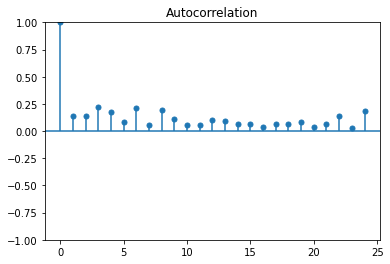

In [21]:
plot_acf(myrbetriq_wkly['myrb_dollars'], alpha=None, lags=24);

C:\Users\sarah\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


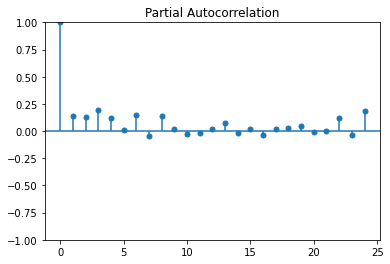

In [22]:
plot_pacf(myrbetriq_wkly['myrb_dollars'], alpha=None, lags=24);

Adding 1 to the weekly sales for each observation so that Holt_winters will work.

In [23]:
myrbetriq_wkly['myrb_dollars'] = [i+1 for i in myrbetriq_wkly['myrb_dollars']]

Set up Train and Test Sets using 2018, 2019 & 2020 Data

In [24]:
train = myrbetriq_wkly.loc[:'2019-12-31']
train

,myrbetriq,myrb_dollars,z_score
Date_of_Payment,,,
2013-08-04,2,22.42,-0.206495
2013-08-11,13,171.99,-1.123933
2013-08-18,16,183.09,-1.578212
2013-08-25,2,115.56,0.433647
2013-09-01,8,110.09,-0.665085
...,...,...,...
2019-12-01,0,1.00,0.000000
2019-12-08,3,40.86,-0.256615
2019-12-15,5,85.87,-0.300978


In [25]:
train['myrb_dollars'].max()

1911.41

In [26]:
train.describe()

,myrbetriq,myrb_dollars,z_score
count,335.000000,335.000000,335.000000
mean,9.507463,155.229851,-0.621447
std,7.076936,183.265987,0.996822
min,0.000000,1.000000,-4.007732
25%,4.000000,58.785000,-1.072764
50%,8.000000,113.890000,-0.594759
75%,14.000000,202.775000,-0.221193
max,38.000000,1911.410000,7.647515


In [27]:
train.index.freq = 'W' 

In [28]:
train.shape

(335, 3)

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 335 entries, 2013-08-04 to 2019-12-29
Freq: W-SUN
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   myrbetriq     335 non-null    int64  
 1   myrb_dollars  335 non-null    float64
 2   z_score       335 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 10.5 KB


In [30]:
train.index

DatetimeIndex(['2013-08-04', '2013-08-11', '2013-08-18', '2013-08-25',
               '2013-09-01', '2013-09-08', '2013-09-15', '2013-09-22',
               '2013-09-29', '2013-10-06',
               ...
               '2019-10-27', '2019-11-03', '2019-11-10', '2019-11-17',
               '2019-11-24', '2019-12-01', '2019-12-08', '2019-12-15',
               '2019-12-22', '2019-12-29'],
              dtype='datetime64[ns]', name='Date_of_Payment', length=335, freq='W-SUN')

In [31]:
test = myrbetriq_wkly.loc['2020-01-01':]
test

,myrbetriq,myrb_dollars,z_score
Date_of_Payment,,,
2020-01-05,0,1.00,0.000000
2020-01-12,2,28.51,-0.164639
2020-01-19,16,230.96,-1.249207
2020-01-26,5,67.11,-0.429913
2020-02-02,7,105.19,-0.521906
2020-02-09,10,181.21,-0.529996
2020-02-16,8,136.91,-0.480754
2020-02-23,14,230.05,-0.901749
2020-03-01,7,101.57,-0.546786


In [32]:
test.describe()

,myrbetriq,myrb_dollars,z_score
count,51.000000,51.000000,51.000000
mean,3.784314,61.336863,-0.254590
std,4.473539,72.861163,0.302201
min,0.000000,1.000000,-1.249207
25%,0.000000,1.000000,-0.455918
50%,2.000000,35.960000,-0.113436
75%,7.000000,102.780000,0.000000
max,16.000000,237.580000,0.000000


In [33]:
test.shape

(51, 3)

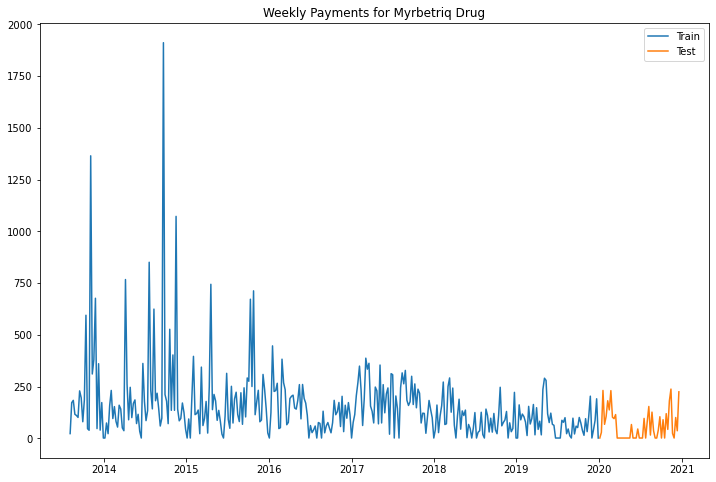

In [34]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['myrb_dollars'], label='Train')
plt.plot(test.index, test['myrb_dollars'], label='Test')

plt.legend(loc='best')
plt.title("Weekly Payments for Myrbetriq Drug");

Baseline (Naive Model)

In [35]:
df_preds = test.copy(deep=True)
df_preds

,myrbetriq,myrb_dollars,z_score
Date_of_Payment,,,
2020-01-05,0,1.00,0.000000
2020-01-12,2,28.51,-0.164639
2020-01-19,16,230.96,-1.249207
2020-01-26,5,67.11,-0.429913
2020-02-02,7,105.19,-0.521906
2020-02-09,10,181.21,-0.529996
2020-02-16,8,136.91,-0.480754
2020-02-23,14,230.05,-0.901749
2020-03-01,7,101.57,-0.546786


In [36]:
df_preds['simple_mean'] = train['myrb_dollars'].mean()
df_preds

,myrbetriq,myrb_dollars,z_score,simple_mean
Date_of_Payment,,,,
2020-01-05,0,1.00,0.000000,155.229851
2020-01-12,2,28.51,-0.164639,155.229851
2020-01-19,16,230.96,-1.249207,155.229851
2020-01-26,5,67.11,-0.429913,155.229851
2020-02-02,7,105.19,-0.521906,155.229851
2020-02-09,10,181.21,-0.529996,155.229851
2020-02-16,8,136.91,-0.480754,155.229851
2020-02-23,14,230.05,-0.901749,155.229851
2020-03-01,7,101.57,-0.546786,155.229851


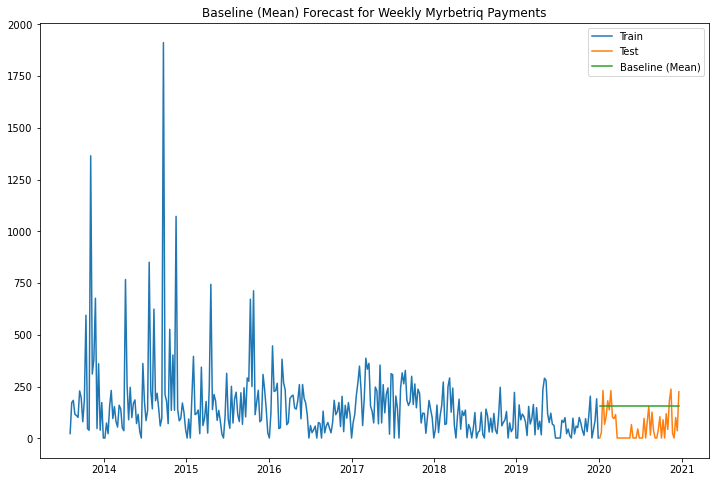

In [37]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['myrb_dollars'], label='Train')
plt.plot(test.index, test['myrb_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['simple_mean'], label="Baseline (Mean)")

plt.legend(loc='best')
plt.title("Baseline (Mean) Forecast for Weekly Myrbetriq Payments");

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [39]:
print("MAE for Simple Mean Baseline Model:", mean_absolute_error(df_preds['myrb_dollars'], df_preds['simple_mean']))
print("RMSE for Simple Mean Baseline Model:", mean_squared_error(df_preds['myrb_dollars'], df_preds['simple_mean'], squared=False))

MAE for Simple Mean Baseline Model: 107.74165057067596
RMSE for Simple Mean Baseline Model: 118.40839958308675


Make a Seasonal Baseline Model with shift of 7

In [40]:
df_preds['seasonal_7'] = train['myrb_dollars'].shift(7, freq='W-SUN') 
df_preds.head(2)

,myrbetriq,myrb_dollars,z_score,simple_mean,seasonal_7
Date_of_Payment,,,,,
2020-01-05,0,1.00,0.000000,155.229851,105.50
2020-01-12,2,28.51,-0.164639,155.229851,203.35


In [41]:
df_preds['seasonal_7'].fillna(0, inplace=True)

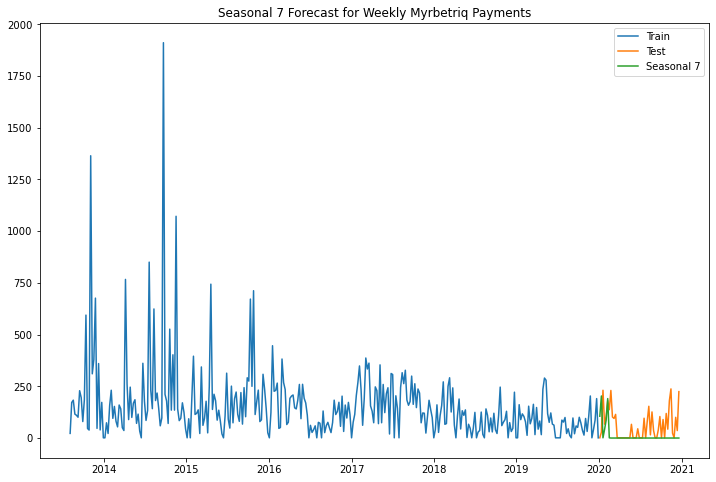

In [42]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['myrb_dollars'], label='Train')
plt.plot(test.index, test['myrb_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['seasonal_7'], label='Seasonal 7')

plt.legend(loc='best')
plt.title("Seasonal 7 Forecast for Weekly Myrbetriq Payments");

In [43]:
print("MAE for Seasonal Baseline 7 Shift Model:", mean_absolute_error(df_preds['myrb_dollars'], df_preds['seasonal_7']))
print("RMSE for Seasonal Baseline 7 Shift Model:", mean_squared_error(df_preds['myrb_dollars'], df_preds['seasonal_7'], squared=False))

MAE for Seasonal Baseline 7 Shift Model: 60.34392156862745
RMSE for Seasonal Baseline 7 Shift Model: 93.93345235105667


Seasonal Baseline Model with shift of 52

In [44]:
df_preds['seasonal_52'] = train['myrb_dollars'].shift(52, freq='W-SUN') 
df_preds.head(2)

,myrbetriq,myrb_dollars,z_score,simple_mean,seasonal_7,seasonal_52
Date_of_Payment,,,,,,
2020-01-05,0,1.00,0.000000,155.229851,105.50,1.00
2020-01-12,2,28.51,-0.164639,155.229851,203.35,161.24


In [45]:
df_preds['seasonal_52'].fillna(0, inplace=True)

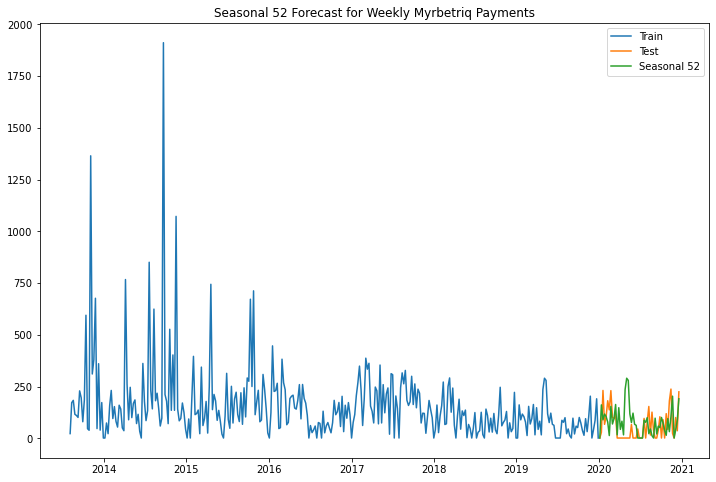

In [46]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['myrb_dollars'], label='Train')
plt.plot(test.index, test['myrb_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['seasonal_52'], label='Seasonal 52')

plt.legend(loc='best')
plt.title("Seasonal 52 Forecast for Weekly Myrbetriq Payments");

In [47]:
print("MAE for Seasonal Baseline 52 Shift Model:", mean_absolute_error(df_preds['myrb_dollars'], df_preds['seasonal_52']))
print("RMSE for Seasonal Baseline 52 Shift Model:", mean_squared_error(df_preds['myrb_dollars'], df_preds['seasonal_52'], squared=False))

MAE for Seasonal Baseline 52 Shift Model: 73.39254901960786
RMSE for Seasonal Baseline 52 Shift Model: 100.57080301761462


Simple Exponential Smoothing Model

In [48]:
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing

In [49]:
ses = SimpleExpSmoothing(train['myrb_dollars']).fit(smoothing_level=.5)

In [50]:
ses.summary()

Dep. Variable:,myrb_dollars,No. Observations:,335
Model:,SimpleExpSmoothing,SSE,13177375.508
Optimized:,True,AIC,3548.260
Trend:,None,BIC,3555.889
Seasonal:,None,AICC,3548.381
Seasonal Periods:,None,Date:,"Mon, 14 Mar 2022"
Box-Cox:,False,Time:,14:36:02
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5000000,alpha,False
initial_level,92.641806,l.0,True


In [51]:
ses_forecast = ses.forecast(len(test))

In [52]:
df_preds['ses'] = ses_forecast

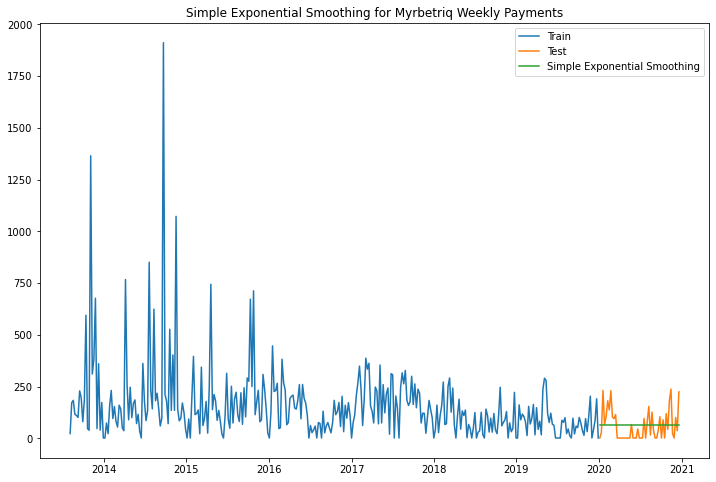

In [53]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['myrb_dollars'], label='Train')
plt.plot(test.index, test['myrb_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['ses'], label='Simple Exponential Smoothing')

plt.legend(loc='best')
plt.title("Simple Exponential Smoothing for Myrbetriq Weekly Payments");

In [54]:
print("MAE for Simple Exponential Smoothing Model:", mean_absolute_error(df_preds['myrb_dollars'], df_preds['ses']))
print("RMSE for Simple Exponential Smoothing Model:", mean_squared_error(df_preds['myrb_dollars'], df_preds['ses'], squared=False))

MAE for Simple Exponential Smoothing Model: 61.64414521914454
RMSE for Simple Exponential Smoothing Model: 72.28545153026695


Holt-Winters Multiplicative Model with Seasonality of 52

In [55]:
hw_m52 = ExponentialSmoothing(
    train['myrb_dollars'],
    seasonal_periods=52, 
    trend='mul',
    seasonal='mul'
).fit()

C:\Users\sarah\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [56]:
hw_m52.summary()

Dep. Variable:,myrb_dollars,No. Observations:,335
Model:,ExponentialSmoothing,SSE,8105130.838
Optimized:,True,AIC,3493.449
Trend:,Multiplicative,BIC,3707.040
Seasonal:,Multiplicative,AICC,3518.246
Seasonal Periods:,52,Date:,"Mon, 14 Mar 2022"
Box-Cox:,False,Time:,14:36:03
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1110773,alpha,True
smoothing_trend,0.0123426,beta,True


In [57]:
df_preds['hw_m52'] = hw_m52.forecast(len(test))
df_preds.head(2)

,myrbetriq,myrb_dollars,z_score,simple_mean,seasonal_7,seasonal_52,ses,hw_m52
Date_of_Payment,,,,,,,,
2020-01-05,0,1.00,0.000000,155.229851,105.50,1.00,65.867934,66.310027
2020-01-12,2,28.51,-0.164639,155.229851,203.35,161.24,65.867934,113.235945


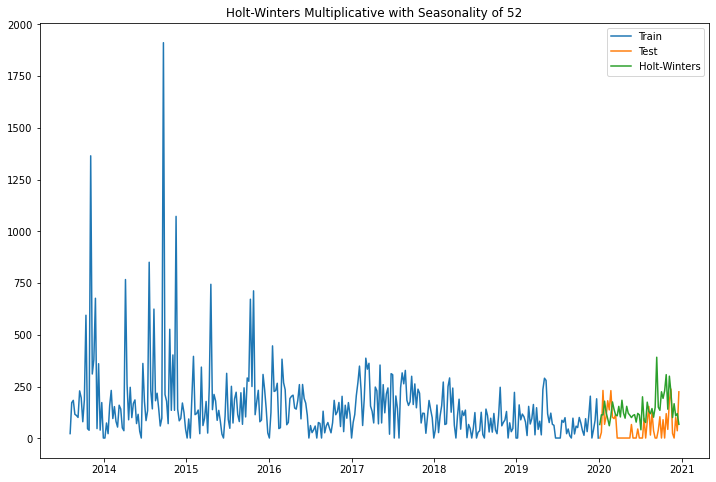

In [58]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['myrb_dollars'], label='Train')
plt.plot(test.index, test['myrb_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['hw_m52'], label='Holt-Winters')

plt.legend(loc='best')
plt.title("Holt-Winters Multiplicative with Seasonality of 52");

In [59]:
print("MAE for Holt-Winters Multiplicative with Seasonality of 52 Model:", mean_absolute_error(df_preds['myrb_dollars'], df_preds['hw_m52']))
print("RMSE for Holt-Winters Multiplicative with Seasonality of 52 Model:", mean_squared_error(df_preds['myrb_dollars'], df_preds['hw_m52'], squared=False))

MAE for Holt-Winters Multiplicative with Seasonality of 52 Model: 102.81545204162308
RMSE for Holt-Winters Multiplicative with Seasonality of 52 Model: 123.0734328170006


Now, try an additive Holt-Winters Model with a seasonal period of 52.

In [60]:
hw_a52 = ExponentialSmoothing(
    train['myrb_dollars'],
    seasonal_periods=52, 
    trend='add',
    seasonal='add'
).fit()

In [61]:
hw_a52.summary()

Dep. Variable:,myrb_dollars,No. Observations:,335
Model:,ExponentialSmoothing,SSE,9483767.064
Optimized:,True,AIC,3546.072
Trend:,Additive,BIC,3759.663
Seasonal:,Additive,AICC,3570.869
Seasonal Periods:,52,Date:,"Mon, 14 Mar 2022"
Box-Cox:,False,Time:,14:36:04
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1164132,alpha,True
smoothing_trend,0.0135566,beta,True


In [62]:
df_preds['hw_a52'] = hw_a52.forecast(len(test))
df_preds.head(2)

,myrbetriq,myrb_dollars,z_score,simple_mean,seasonal_7,seasonal_52,ses,hw_m52,hw_a52
Date_of_Payment,,,,,,,,,
2020-01-05,0,1.00,0.000000,155.229851,105.50,1.00,65.867934,66.310027,-9.925921
2020-01-12,2,28.51,-0.164639,155.229851,203.35,161.24,65.867934,113.235945,83.314667


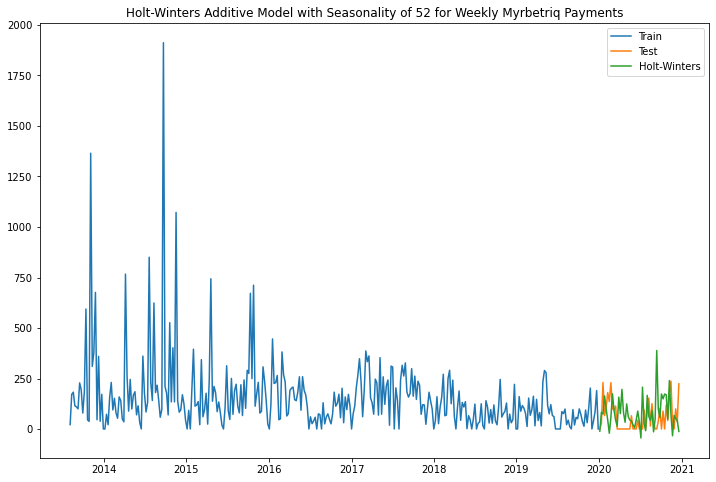

In [63]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['myrb_dollars'], label='Train')
plt.plot(test.index, test['myrb_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['hw_a52'], label='Holt-Winters')

plt.legend(loc='best')
plt.title("Holt-Winters Additive Model with Seasonality of 52 for Weekly Myrbetriq Payments");

In [64]:
print("MAE for Holt-Winters Additive with Seasonality of 52 Model:", mean_absolute_error(df_preds['myrb_dollars'], df_preds['hw_a52']))
print("RMSE for Holt-Winters Additive with Seasonality of 52 Model:", mean_squared_error(df_preds['myrb_dollars'], df_preds['hw_a52'], squared=False))

MAE for Holt-Winters Additive with Seasonality of 52 Model: 81.4800788588057
RMSE for Holt-Winters Additive with Seasonality of 52 Model: 109.77979838096323


Now, try an additive Holt-Winters Model with a seasonal period of 7.

In [65]:
hw_a7 = ExponentialSmoothing(
    train['myrb_dollars'],
    seasonal_periods=7, 
    trend='add',
    seasonal='add'
).fit()

In [66]:
hw_a7.summary()

Dep. Variable:,myrb_dollars,No. Observations:,335
Model:,ExponentialSmoothing,SSE,11888841.519
Optimized:,True,AIC,3531.788
Trend:,Additive,BIC,3573.744
Seasonal:,Additive,AICC,3532.922
Seasonal Periods:,7,Date:,"Mon, 14 Mar 2022"
Box-Cox:,False,Time:,14:36:05
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1336399,alpha,True
smoothing_trend,0.0438917,beta,True


In [67]:
df_preds['hw_a7'] = hw_a7.forecast(len(test))
df_preds.head(2)

,myrbetriq,myrb_dollars,z_score,simple_mean,seasonal_7,seasonal_52,ses,hw_m52,hw_a52,hw_a7
Date_of_Payment,,,,,,,,,,
2020-01-05,0,1.00,0.000000,155.229851,105.50,1.00,65.867934,66.310027,-9.925921,73.238287
2020-01-12,2,28.51,-0.164639,155.229851,203.35,161.24,65.867934,113.235945,83.314667,87.360304


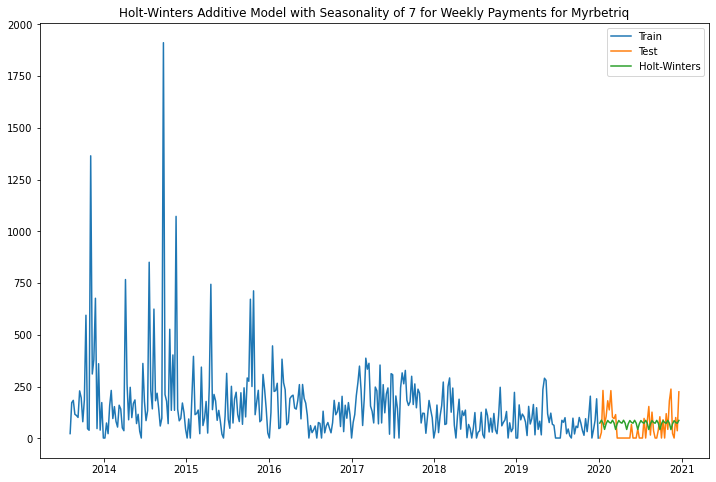

In [68]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['myrb_dollars'], label='Train')
plt.plot(test.index, test['myrb_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['hw_a7'], label='Holt-Winters')

plt.legend(loc='best')
plt.title("Holt-Winters Additive Model with Seasonality of 7 for Weekly Payments for Myrbetriq");

In [69]:
print("MAE for Holt-Winters Additive with Seasonality of 7 Model:", mean_absolute_error(df_preds['myrb_dollars'], df_preds['hw_a7']))
print("RMSE for Holt-Winters Additive with Seasonality of 7 Model:", mean_squared_error(df_preds['myrb_dollars'], df_preds['hw_a7'], squared=False))

MAE for Holt-Winters Additive with Seasonality of 7 Model: 66.27969854111566
RMSE for Holt-Winters Additive with Seasonality of 7 Model: 76.88866274257177


Now, try a multiplicative Holt-Winters Model with a seasonal period of 7.

In [70]:
hw_m7 = ExponentialSmoothing(
    train['myrb_dollars'],
    seasonal_periods=7, 
    trend='mul',
    seasonal='mul'
).fit()

C:\Users\sarah\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\sarah\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [71]:
hw_m7.summary()

Dep. Variable:,myrb_dollars,No. Observations:,335
Model:,ExponentialSmoothing,SSE,19795615.492
Optimized:,True,AIC,3702.592
Trend:,Multiplicative,BIC,3744.547
Seasonal:,Multiplicative,AICC,3703.726
Seasonal Periods:,7,Date:,"Mon, 14 Mar 2022"
Box-Cox:,False,Time:,14:36:05
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3232143,alpha,True
smoothing_trend,0.1212054,beta,True


In [72]:
df_preds['hw_m7'] = hw_m7.forecast(len(test))
df_preds.head(2)

,myrbetriq,myrb_dollars,z_score,simple_mean,seasonal_7,seasonal_52,ses,hw_m52,hw_a52,hw_a7,hw_m7
Date_of_Payment,,,,,,,,,,,
2020-01-05,0,1.00,0.000000,155.229851,105.50,1.00,65.867934,66.310027,-9.925921,73.238287,92.207162
2020-01-12,2,28.51,-0.164639,155.229851,203.35,161.24,65.867934,113.235945,83.314667,87.360304,103.158446


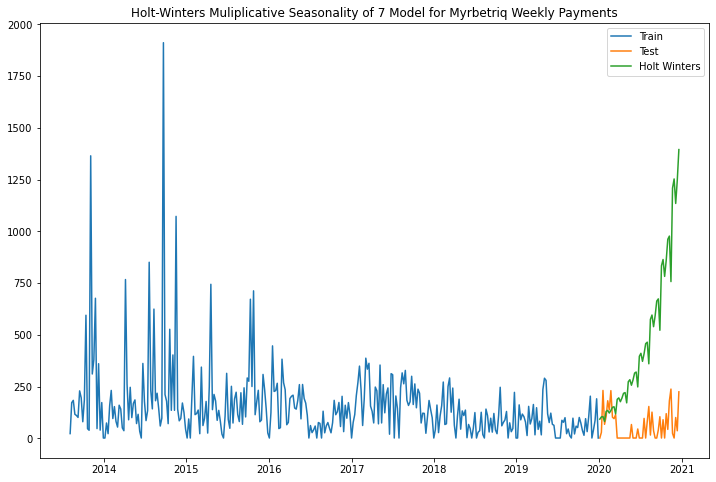

In [73]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['myrb_dollars'], label='Train')
plt.plot(test.index, test['myrb_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['hw_m7'], label='Holt Winters')

plt.legend(loc='best')
plt.title("Holt-Winters Muliplicative Seasonality of 7 Model for Myrbetriq Weekly Payments");

In [74]:
print("MAE for Holt-Winters Multiplicative with Seasonality of 7 Model:", mean_absolute_error(df_preds['myrb_dollars'], df_preds['hw_m7']))
print("RMSE for Holt-Winters Multiplicative with Seasonality of 7 Model:", mean_squared_error(df_preds['myrb_dollars'], df_preds['hw_m7'], squared=False))

MAE for Holt-Winters Multiplicative with Seasonality of 7 Model: 419.57919065027147
RMSE for Holt-Winters Multiplicative with Seasonality of 7 Model: 542.4296624447348


Try a SARIMA Model

In [75]:
from pmdarima.utils import tsdisplay

In [76]:
traina = train['myrb_dollars']

C:\Users\sarah\anaconda3\lib\site-packages\pmdarima\utils\visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  res = tsaplots.plot_acf(


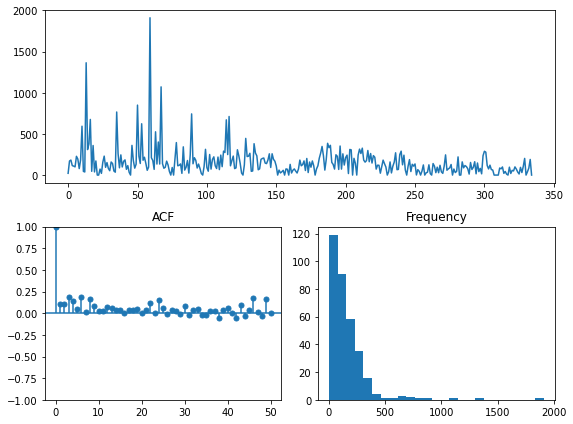

In [77]:
tsdisplay(traina)

In [78]:
import pmdarima as pmd
model_s7 = pmd.auto_arima(train['myrb_dollars'], m=7, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=0.92 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=4626.937, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=4530.950, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=4624.937, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=4531.993, Time=0.02 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=4532.693, Time=0.10 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=4532.508, Time=0.29 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=4530.786, Time=0.13 sec
 ARIMA(1,1,0)(0,0,2)[7] intercept   : AIC=4532.672, Time=0.10 sec
 ARIMA(1,1,0)(1,0,2)[7] intercept   : AIC=4534.683, Time=0.12 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=4617.112, Time=0.11 sec
 ARIMA(2,1,0)(0,0,1)[7] intercept   : AIC=4476.956, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[7] intercept   : AIC=4477.576, Time=0.03 sec
 ARIMA(2,1,0)(1,0,1)[7] intercept   : AIC=4

In [79]:
model_s7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  335
Model:               SARIMAX(4, 1, 4)   Log Likelihood               -2196.428
Date:                Mon, 14 Mar 2022   AIC                           4410.856
Time:                        14:37:32   BIC                           4445.157
Sample:                             0   HQIC                          4424.532
                                - 335                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9978      0.234     -4.267      0.000      -1.456      -0.539
ar.L2          0.2979      0.361      0.825      0.410      -0.410       1.006
ar.L3          0.7313      0.197      3.704      0.000       0.344       1.118
ar.L4          0.1615      0.080      2.029      0.042       0.006       0.318
ma.L1          0.0842      0.221      0.381      0.703      -0.349       0.517
ma.L2         -1.2595      0.188     -6.702      0.000      -1.628      -0.891
ma.L3         -0.3941      0.168     -2.350      0.019      -0.723      -0.065
ma.L4          0.5934      0.211      2.807      0.005       0.179       1.008
sigma2      2.871e+04   1143.637     25.108      0.000    2.65e+04     3.1e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             16292.61
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.09   Skew:                             4.33
Prob(H) (two-sided):                  0.00   Kurtosis:                        36.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [80]:
preds_sar7 = model_s7.predict(test.shape[0])
preds_sar7

array([95.80576033, 89.08306742, 88.35888064, 81.43643779, 98.52533443,
       77.79597317, 98.39201918, 83.04379916, 92.09589869, 90.20409941,
       86.8915712 , 93.77372362, 85.99844358, 93.07913765, 88.19518579,
       90.60372393, 90.66745458, 88.89360985, 91.65499404, 88.80681885,
       91.18457273, 89.6962944 , 90.25293587, 90.53286382, 89.71510688,
       90.78113895, 89.76842415, 90.54373007, 90.11588388, 90.20539243,
       90.39199893, 90.04482406, 90.44318239, 90.09318207, 90.33735832,
       90.22467537, 90.21825546, 90.31311719, 90.17358823, 90.31817795,
       90.20066851, 90.274286  , 90.24901834, 90.23358603, 90.27631087,
       90.22249516, 90.27355534, 90.23532479, 90.25623074, 90.25262726,
       90.2427416 ])

In [81]:
df_preds['sarima7_auto'] = preds_sar7
df_preds['sarima7_auto'].head(2)

Date_of_Payment
2020-01-05    95.805760
2020-01-12    89.083067
Freq: W-SUN, Name: sarima7_auto, dtype: float64

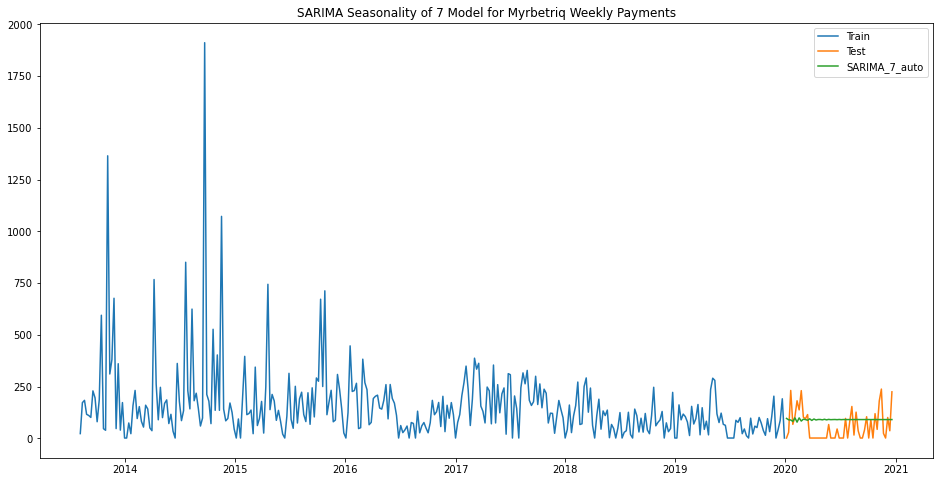

In [82]:
plt.figure(figsize=(16,8))
plt.plot(train['myrb_dollars'], label='Train')
plt.plot(test['myrb_dollars'], label='Test')
plt.plot(df_preds['sarima7_auto'], label='SARIMA_7_auto')
plt.legend(loc='best')
plt.title("SARIMA Seasonality of 7 Model for Myrbetriq Weekly Payments");

In [83]:
print("MAE for SARIMA with Seasonality of 7 Model:", mean_absolute_error(df_preds['myrb_dollars'], df_preds['sarima7_auto']))
print("RMSE for SARIMA with Seasonality of 7 Model:", mean_squared_error(df_preds['myrb_dollars'], df_preds['sarima7_auto'], squared=False))

MAE for SARIMA with Seasonality of 7 Model: 68.25085842019395
RMSE for SARIMA with Seasonality of 7 Model: 78.335218510561


Try a SARIMA Model with m = 52

In [84]:
model_s52 = pmd.auto_arima(train['myrb_dollars'], m=52, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[52] intercept   : AIC=inf, Time=9.13 sec
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=4626.937, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=4533.987, Time=0.59 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=inf, Time=2.20 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=4624.937, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[52] intercept   : AIC=4531.993, Time=0.02 sec
 ARIMA(1,1,0)(0,0,1)[52] intercept   : AIC=4533.987, Time=0.69 sec
 ARIMA(1,1,0)(1,0,1)[52] intercept   : AIC=4535.959, Time=1.85 sec
 ARIMA(2,1,0)(0,0,0)[52] intercept   : AIC=4477.576, Time=0.03 sec
 ARIMA(2,1,0)(1,0,0)[52] intercept   : AIC=4479.279, Time=0.90 sec
 ARIMA(2,1,0)(0,0,1)[52] intercept   : AIC=4479.286, Time=0.92 sec
 ARIMA(2,1,0)(1,0,1)[52] intercept   : AIC=4481.233, Time=2.59 sec
 ARIMA(3,1,0)(0,0,0)[52] intercept   : AIC=4457.934, Time=0.04 sec
 ARIMA(3,1,0)(1,0,0)[52] intercept   : AIC=4459.680, Time=1.19 sec
 ARIMA(3,1,0)(0,0,1)[52] inte

In [85]:
model_s52.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  335
Model:               SARIMAX(4, 1, 4)   Log Likelihood               -2196.428
Date:                Mon, 14 Mar 2022   AIC                           4410.856
Time:                        14:42:11   BIC                           4445.157
Sample:                             0   HQIC                          4424.532
                                - 335                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9978      0.234     -4.267      0.000      -1.456      -0.539
ar.L2          0.2979      0.361      0.825      0.410      -0.410       1.006
ar.L3          0.7313      0.197      3.704      0.000       0.344       1.118
ar.L4          0.1615      0.080      2.029      0.042       0.006       0.318
ma.L1          0.0842      0.221      0.381      0.703      -0.349       0.517
ma.L2         -1.2595      0.188     -6.702      0.000      -1.628      -0.891
ma.L3         -0.3941      0.168     -2.350      0.019      -0.723      -0.065
ma.L4          0.5934      0.211      2.807      0.005       0.179       1.008
sigma2      2.871e+04   1143.637     25.108      0.000    2.65e+04     3.1e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             16292.61
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.09   Skew:                             4.33
Prob(H) (two-sided):                  0.00   Kurtosis:                        36.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [86]:
preds_sar52 = model_s52.predict(test.shape[0])
preds_sar52

array([95.80576033, 89.08306742, 88.35888064, 81.43643779, 98.52533443,
       77.79597317, 98.39201918, 83.04379916, 92.09589869, 90.20409941,
       86.8915712 , 93.77372362, 85.99844358, 93.07913765, 88.19518579,
       90.60372393, 90.66745458, 88.89360985, 91.65499404, 88.80681885,
       91.18457273, 89.6962944 , 90.25293587, 90.53286382, 89.71510688,
       90.78113895, 89.76842415, 90.54373007, 90.11588388, 90.20539243,
       90.39199893, 90.04482406, 90.44318239, 90.09318207, 90.33735832,
       90.22467537, 90.21825546, 90.31311719, 90.17358823, 90.31817795,
       90.20066851, 90.274286  , 90.24901834, 90.23358603, 90.27631087,
       90.22249516, 90.27355534, 90.23532479, 90.25623074, 90.25262726,
       90.2427416 ])

In [87]:
df_preds['sarima52_auto'] = preds_sar52
df_preds['sarima52_auto'].head(2)

Date_of_Payment
2020-01-05    95.805760
2020-01-12    89.083067
Freq: W-SUN, Name: sarima52_auto, dtype: float64

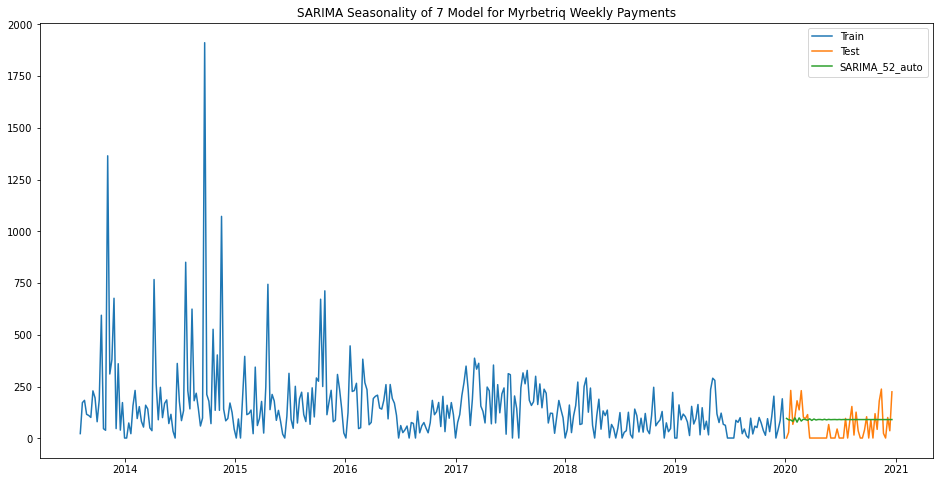

In [88]:
plt.figure(figsize=(16,8))
plt.plot(train['myrb_dollars'], label='Train')
plt.plot(test['myrb_dollars'], label='Test')
plt.plot(df_preds['sarima52_auto'], label='SARIMA_52_auto')
plt.legend(loc='best')
plt.title("SARIMA Seasonality of 7 Model for Myrbetriq Weekly Payments");

In [89]:
print("MAE for Holt-Winters Additive with Seasonality of 52 Model:", mean_absolute_error(df_preds['myrb_dollars'], df_preds['sarima52_auto']))
print("RMSE for Holt-Winters Additive with Seasonality of 52 Model:", mean_squared_error(df_preds['myrb_dollars'], df_preds['sarima52_auto'], squared=False))

MAE for Holt-Winters Additive with Seasonality of 52 Model: 68.25085842019395
RMSE for Holt-Winters Additive with Seasonality of 52 Model: 78.335218510561


In [90]:
print("Summary of Metrics for Weekly Myrbetriq CMS Payments")
print("_________________________________________________")
print("MAE for Simple Mean Baseline Model:", mean_absolute_error(df_preds['myrb_dollars'], df_preds['simple_mean']))
print("RMSE for Simple Mean Baseline Model:", mean_squared_error(df_preds['myrb_dollars'], df_preds['simple_mean'], squared=False))
print("_________________________________________________")
print("MAE for Seasonal Baseline 7 Shift Model:", mean_absolute_error(df_preds['myrb_dollars'], df_preds['seasonal_7']))
print("RMSE for Seasonal Baseline 7 Shift Model:", mean_squared_error(df_preds['myrb_dollars'], df_preds['seasonal_7'], squared=False))
print("_________________________________________________")
print("MAE for Seasonal Baseline 52 Shift Model:", mean_absolute_error(df_preds['myrb_dollars'], df_preds['seasonal_52']))
print("RMSE for Seasonal Baseline 52 Shift Model:", mean_squared_error(df_preds['myrb_dollars'], df_preds['seasonal_52'], squared=False))
print("_________________________________________________")
print("MAE for Simple Exponential Smoothing Model:", mean_absolute_error(df_preds['myrb_dollars'], df_preds['ses']))
print("RMSE for Simple Exponential Smoothing Model:", mean_squared_error(df_preds['myrb_dollars'], df_preds['ses'], squared=False))
print("_________________________________________________")
print("MAE for Holt-Winters Multiplicative with Seasonality of 7 Model:", mean_absolute_error(df_preds['myrb_dollars'], df_preds['hw_m7']))
print("RMSE for Holt-Winters Multiplicative with Seasonality of 7 Model:", mean_squared_error(df_preds['myrb_dollars'], df_preds['hw_m7'], squared=False))
print("_________________________________________________")
print("MAE for Holt-Winters Multiplicative with Seasonality of 52 Model:", mean_absolute_error(df_preds['myrb_dollars'], df_preds['hw_m52']))
print("RMSE for Holt-Winters Multiplicative with Seasonality of 52 Model:", mean_squared_error(df_preds['myrb_dollars'], df_preds['hw_m52'], squared=False))
print("_________________________________________________")


Summary of Metrics for Weekly Myrbetriq CMS Payments
_________________________________________________
MAE for Simple Mean Baseline Model: 107.74165057067596
RMSE for Simple Mean Baseline Model: 118.40839958308675
_________________________________________________
MAE for Seasonal Baseline 7 Shift Model: 60.34392156862745
RMSE for Seasonal Baseline 7 Shift Model: 93.93345235105667
_________________________________________________
MAE for Seasonal Baseline 52 Shift Model: 73.39254901960786
RMSE for Seasonal Baseline 52 Shift Model: 100.57080301761462
_________________________________________________
MAE for Simple Exponential Smoothing Model: 61.64414521914454
RMSE for Simple Exponential Smoothing Model: 72.28545153026695
_________________________________________________
MAE for Holt-Winters Multiplicative with Seasonality of 7 Model: 419.57919065027147
RMSE for Holt-Winters Multiplicative with Seasonality of 7 Model: 542.4296624447348
_________________________________________________
MA

In [91]:
print("Continued Summary of Metrics for Weeky Myrbetriq CMS Payments")
print("_________________________________________________")
print("MAE for Holt-Winters Additive with Seasonality of 7 Model:", mean_absolute_error(df_preds['myrb_dollars'], df_preds['hw_a7']))
print("RMSE for Holt-Winters Additive with Seasonality of 7 Model:", mean_squared_error(df_preds['myrb_dollars'], df_preds['hw_a7'], squared=False))
print("_________________________________________________")
print("MAE for Holt-Winters Additive with Seasonality of 52 Model:", mean_absolute_error(df_preds['myrb_dollars'], df_preds['hw_a52']))
print("RMSE for Holt-Winters Additive with Seasonality of 52 Model:", mean_squared_error(df_preds['myrb_dollars'], df_preds['hw_a52'], squared=False))
print("_________________________________________________")
print("MAE for SARIMA with Seasonality of 7 Model:", mean_absolute_error(df_preds['myrb_dollars'], df_preds['sarima7_auto']))
print("RMSE for SARIMA with Seasonality of 7 Model:", mean_squared_error(df_preds['myrb_dollars'], df_preds['sarima7_auto'], squared=False))
print("_________________________________________________")
print("MAE for SARIMA with Seasonality of 52 Model:", mean_absolute_error(df_preds['myrb_dollars'], df_preds['sarima52_auto']))
print("RMSE for SARIMA with Seasonality of 52 Model:", mean_squared_error(df_preds['myrb_dollars'], df_preds['sarima52_auto'], squared=False))
print("_________________________________________________")

Continued Summary of Metrics for Weeky Myrbetriq CMS Payments
_________________________________________________
MAE for Holt-Winters Additive with Seasonality of 7 Model: 66.27969854111566
RMSE for Holt-Winters Additive with Seasonality of 7 Model: 76.88866274257177
_________________________________________________
MAE for Holt-Winters Additive with Seasonality of 52 Model: 81.4800788588057
RMSE for Holt-Winters Additive with Seasonality of 52 Model: 109.77979838096323
_________________________________________________
MAE for SARIMA with Seasonality of 7 Model: 68.25085842019395
RMSE for SARIMA with Seasonality of 7 Model: 78.335218510561
_________________________________________________
MAE for SARIMA with Seasonality of 52 Model: 68.25085842019395
RMSE for SARIMA with Seasonality of 52 Model: 78.335218510561
_________________________________________________
